Дипомный проект по теме "Анализ оттока клиентов банка (поиск инсайдов и составление рекомендаций стейкхолдерам, построение модели оттока)"

In [ ]:
# Импортируем все необходимые для анализа библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Загружаем датасет для исследования
data = pd.read_csv('churn.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Выведем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Файл churn.csv состоит из 10000 строк и 14 столбцов следующего содержания:



*   Номер строки - тип int64
*   ID пользователя - тип int64
*   Фамилия клиента - тип object
*   Кредитный рейтинг клиента - тип int64
*   Местоположение клиента - тип object
*   Пол клиента - тип object
*   Возраст клиента - тип int64
*   Стаж клиента в банке - тип int64
*   Баланс счета клиента - тип float64
*   Количество продуктов клиента в банке - тип int64
*   Наличие кредитной карты у клиента - тип int64
*   Активность клиента - тип int64
*   Оценочная зарплата клиента - тип float64
*   Покинул ли клиент банк - тип int64











In [ ]:
# Удалим лишние столбцы не влияющие на анализ оттока клиентов из банка
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1 , inplace= True )


In [ ]:
# Выведем описательную статистику для числовых столбцов датасета
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: title={'center': 'Распределение возраста клиентов'}, ylabel='Frequency'>

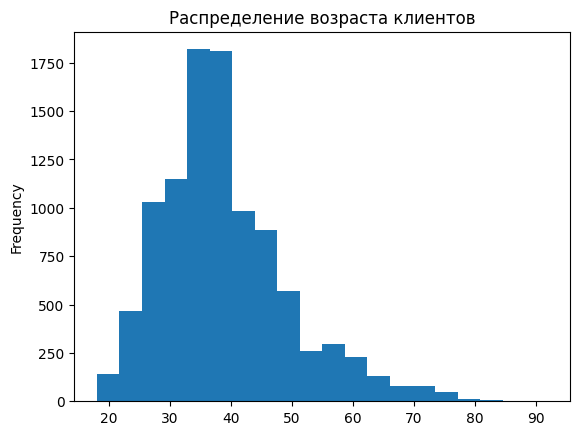

In [ ]:
# Гистограмма распределения возраста клиентов банка

data['Age'].plot(kind='hist', title='Распределение возраста клиентов', bins=20)

Гистограмма возраста клиентов банка имеет асимметричное положительно скошенное распределение со средним значением 38.92, минимальным возрастом 18 лет и максимальным 92 года

<Axes: title={'center': 'Распределение баланса счетов клиентов'}, ylabel='Frequency'>

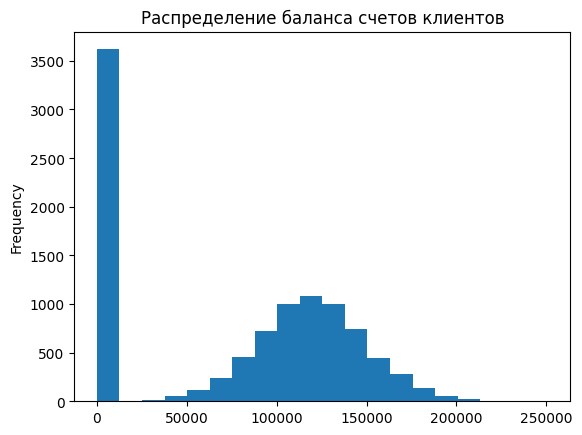

In [ ]:
# Гистограмма распределения баланса счетов  клиентов

data['Balance'].plot(kind='hist',
                   title='Распределение баланса счетов клиентов', bins=20)

Из гистограммы следует что более 1/3 счетов  являются нулевыми, а остальные значения баланса счетов имеют нормальное распределение со средним значением 76485.89

<Axes: title={'center': 'Распределение кредитного рейтинга клиентов'}, ylabel='Frequency'>

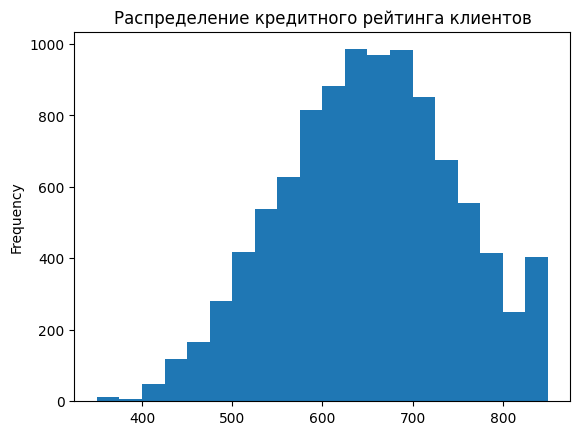

In [ ]:
# Гистограмма распределения кредитного рейтинга клиентов

data['CreditScore'].plot(kind='hist',
                   title='Распределение кредитного рейтинга клиентов', bins=20)

Распределение кредитного рейтинга клиентов имеет распределение, близкое к нормальному, со средним значением 650.5

<Axes: title={'center': 'Распределение стажа клиентов банка'}, ylabel='Frequency'>

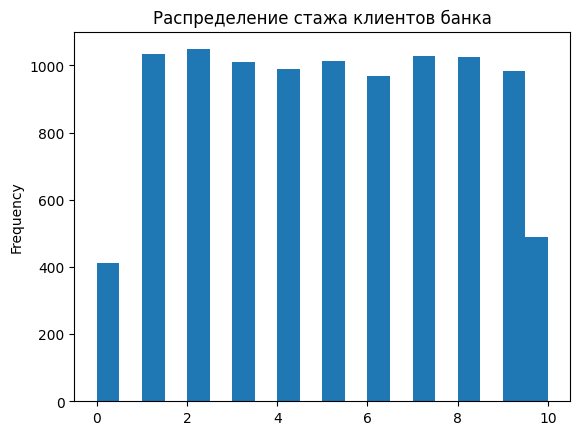

In [ ]:
# Гистограмма распределения стажа клиентов

data['Tenure'].plot(kind='hist',
                   title='Распределение стажа клиентов банка', bins=20)

Распределение стажа клиентов банка имеет рапределение, близкое к закону равной вероятности, со средним значением 5.0. Это говорит нам о том, что данный показатель, скорее всего, не будет влиять на отток клиентов банка.

<Axes: title={'center': 'Распределение количества продуктов банка у клиентов'}, ylabel='Frequency'>

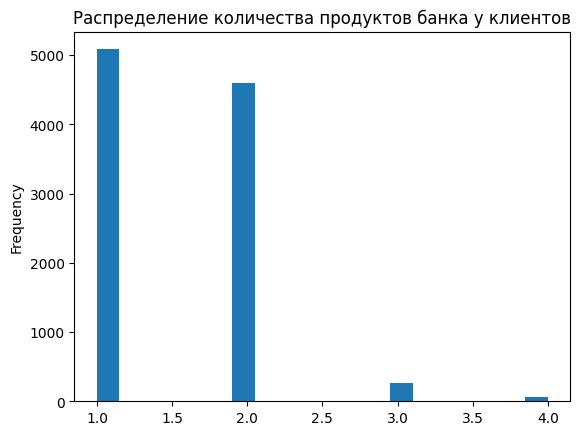

In [ ]:
# Гистограмма распределения количества продуктов банка у клиентов

data['NumOfProducts'].plot(kind='hist',
                   title='Распределение количества продуктов банка у клиентов', bins=20)

Показатель - количество продуктов клиента в банке, имеет практически равное распределение между двумя продуктами

<Axes: title={'center': 'Распределение оценочной зарплаты клиента'}, ylabel='Frequency'>

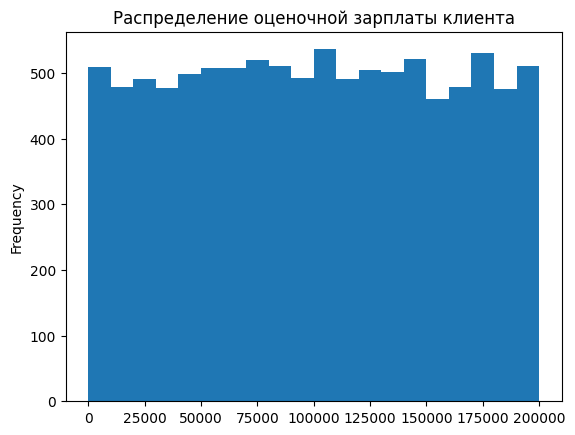

In [ ]:
# Гистограмма распределения оценочной зарплаты клиента

data['EstimatedSalary'].plot(kind='hist',
                   title='Распределение оценочной зарплаты клиента', bins=20)

Распределение оценочной зарплаты клиентов банка имеет рапределение, близкое к закону равной вероятности, со средним значением 100090. Это говорит нам о том, что данный показатель, скорее всего, не влияет на отток клиентов банка.

АНАЛИЗ ПОКАЗАТЕЛЯ - ОТТОК КЛИЕНТА

In [ ]:
# Клиенты покинувшие банк
data_exit = data[(data['Exited'] == 1)]

In [ ]:
# Клиенты, оставшиеся клиентами банка
data_bank = data[(data['Exited'] == 0)]


In [ ]:
# Процент клиентов, покинувших банк
data_1 = data['Exited'].value_counts().reset_index()
data_1['%_churn'] = data_1['Exited']/ len(data)*100
data_1

,index,Exited,%_churn
0,0,7963,79.63
1,1,2037,20.37


<Axes: title={'center': 'Статистика оставшихся и покинувших банк клиентов'}, xlabel='Остался / ушел', ylabel='Процент'>

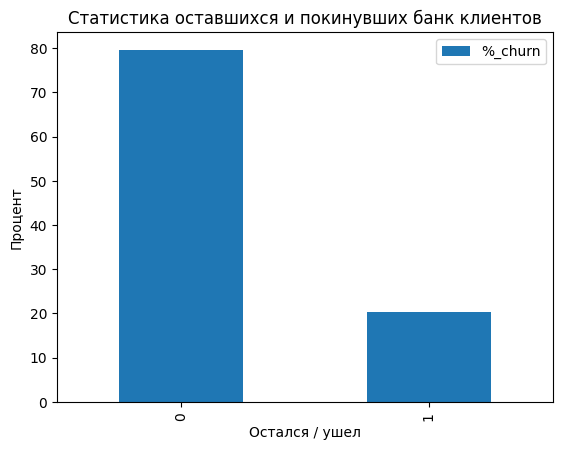

In [ ]:
# Диаграмма по статистике клиентов остался/покинул
data_1.plot(kind='bar',
            x= 'index',
            y= '%_churn',
                xlabel='Остался / ушел',
                 ylabel='Процент',
                   title='Статистика оставшихся и покинувших банк клиентов',)

АНАЛИЗ ПОКАЗАТЕЛЯ - ВОЗРАСТ КЛИЕНТА

In [ ]:
# Средний возраст клиентов оставшихся в банке
data_bank['Age'].mean()

37.40838879819164

In [ ]:
# Средний возраст клиентов, покинувших банк
data_exit['Age'].mean()

44.8379970544919

Text(0.5, 1.0, 'Сравнение распределений возраста клиентов')

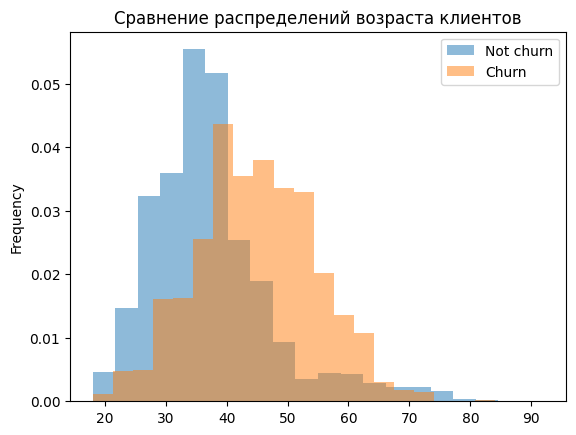

In [ ]:
# Гистограмма сравнения распределения возраста клиентов покинувших банк и оставшихся

data_bank['Age'].plot(kind='hist', alpha = 0.5, density = True, bins=20, label='Not churn')

data_exit['Age'].plot(kind='hist', alpha = 0.5, density = True, bins=20, label='Churn')
plt.legend(loc='upper right')
plt.title('Сравнение распределений возраста клиентов')

Данные указывают что средний возраст ушедших из банка клиентов превышает средний возраст оставшихся клиентов (44,8 против 37,4). То есть можно сделать вывод, что в нашей выборке с увеличением возраста клиенты более склонны покинуть банк

АНАЛИЗ ПОКАЗАТЕЛЯ - МЕСТОНАХОЖДЕНИЕ КЛИЕНТА

In [ ]:
# Сгруппируем клиентов по странам
data_geo = data.groupby('Geography')['Exited'].count().reset_index()
data_geo

,Geography,Exited
0,France,5014
1,Germany,2509
2,Spain,2477


In [ ]:
# Сгруппируем покинувших банк клиентов по странам
data_geo_ex = data_exit.groupby('Geography')['Exited'].count().reset_index()
data_geo_ex

,Geography,Exited
0,France,810
1,Germany,814
2,Spain,413


In [ ]:
# Процент покинувших банк клиентов по странам
data_geo_ex['%_exit'] = round(data_geo_ex['Exited']/data_geo['Exited']*100, 2)
data_geo_ex

,Geography,Exited,%_exit
0,France,810,16.15
1,Germany,814,32.44
2,Spain,413,16.67


<Axes: title={'center': 'Процент покинувших банк клиентов по странам'}, xlabel='Страна', ylabel='Процент'>

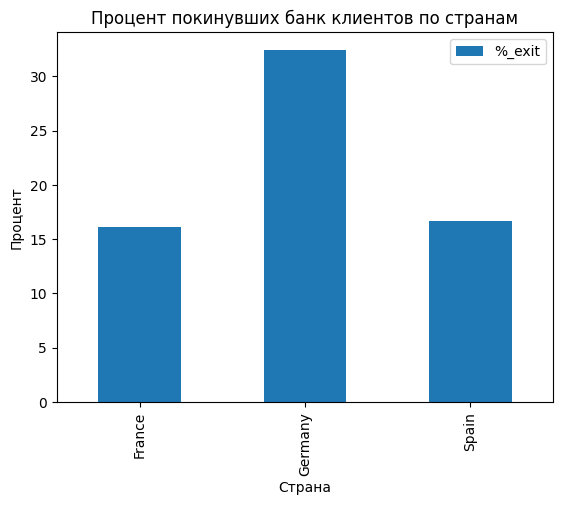

In [ ]:
# Диаграмма покинувших банк клиентов по странам

data_geo_ex.plot(kind='bar',
            x= 'Geography',
            y= '%_exit',
                 xlabel= 'Страна',
                 ylabel= 'Процент',
                 title='Процент покинувших банк клиентов по странам')

Анализируя диаграмму, можно заметить что среди клиентов, покинувших банк, процент клиентов из Германии в два раза больший, чем процент клиентов из Франции и Испании (32.44 против 16.15 и 16.67)

АНАЛИЗ ПОКАЗАТЕЛЯ - НАЛИЧИЕ КРЕДИТНОЙ КАРТЫ

In [ ]:
# Количество клиентов с кредитными картами
data_card = data['HasCrCard'].value_counts().reset_index()
data_card

,index,HasCrCard
0,1,7055
1,0,2945


In [ ]:
# Количество клиентов с кредитными картами покинувшими банк
data_card_ex = data_exit['HasCrCard'].value_counts().reset_index()
data_card_ex

,index,HasCrCard
0,1,1424
1,0,613


In [ ]:
# Количество клиентов с кредитными картами оставшихся в банке
data_card_non = data_bank['HasCrCard'].value_counts().reset_index()
data_card_non

,index,HasCrCard
0,1,5631
1,0,2332


In [ ]:
# Процент клиентов покинувших банк с кредитными картами
data_card_ex['%_exit'] = data_card_ex['HasCrCard']/ data_card['HasCrCard']*100
data_card_ex

,index,HasCrCard,%_exit
0,1,1424,20.184266
1,0,613,20.814941


<Axes: title={'center': 'Процент покинувших банк клиентов по наличию кредитной карты'}, xlabel='С картой / без карты', ylabel='Процент'>

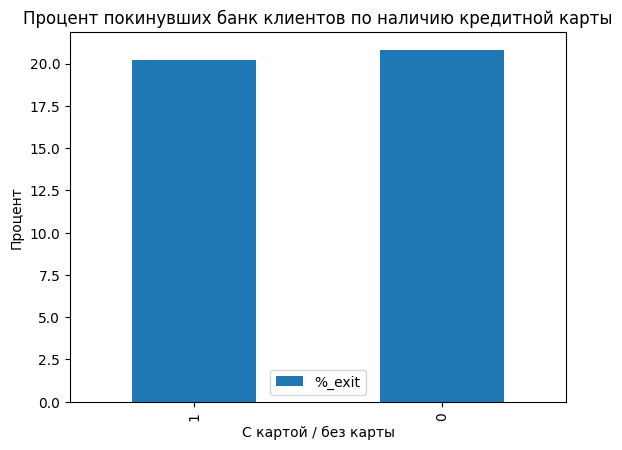

In [ ]:
# Диаграмма клиентов покинувших банк с кредитными картами

data_card_ex.plot(kind='bar',
            x= 'index',
            y= '%_exit',
                    xlabel= 'С картой / без карты',
                    ylabel= 'Процент',
                 title='Процент покинувших банк клиентов по наличию кредитной карты')

Данные говорят о том, что наличие кредитной карты банка у клиента не влияет на его намерение покинуть банк. Процент покинувших банк клиентов с кредитной картой (20,18%) практически такой же как и у клиентов не имеющих кредитной карты (20,81%).


АНАЛИЗ ПОКАЗАТЕЛЯ - ПОЛ КЛИЕНТА

In [ ]:
# Распределение клиентов по полу
data_gender = data.groupby('Gender')['Exited'].count().reset_index()
data_gender

,Gender,Exited
0,Female,4543
1,Male,5457


In [ ]:
# Распределение по полу клиентов, покинувших банк
data_gender_ex = data_exit.groupby('Gender')['Exited'].count().reset_index()
data_gender_ex

,Gender,Exited
0,Female,1139
1,Male,898


In [ ]:
# Процент клиентов покинувших банк по половому признаку
data_gender_ex['%_exit'] = round(data_gender_ex['Exited']/ data_gender['Exited']*100, 2)
data_gender_ex

,Gender,Exited,%_exit
0,Female,1139,25.07
1,Male,898,16.46


<Axes: title={'center': 'Процент покинувших банк клиентов по полу'}, xlabel='Женщины / мужчины', ylabel='Процент'>

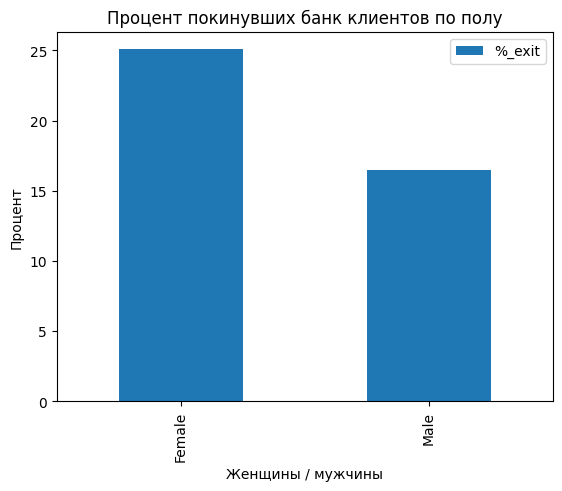

In [ ]:
# Диаграмма покинувших банк клиентов по половому признаку

data_gender_ex.plot(kind='bar',
            x= 'Gender',
            y= '%_exit',
                    xlabel= 'Женщины / мужчины',
                    ylabel= 'Процент',
                 title='Процент покинувших банк клиентов по полу')

Данные показывают,  что среди клиентов банка женщины чаще мужчин принимают решение покинуть банк. В нашей выборке процент женщин покинувших банк составляет 25.07 %, а мужчин 16.46%

АНАЛИЗ ПОКАЗАТЕЛЯ - БАЛАНС СЧЕТА КЛИЕНТА

In [ ]:
# Средний баланс счета клиента, оставшегося в банке
data_bank['Balance'].mean()

72745.2967788522

In [ ]:
# Средний баланс счета клиента, покинувшего банк
data_exit['Balance'].mean()

91108.53933726068

In [ ]:
# Количество клиентов с нулевым счетом в банке

data_bal_0 = data[(data['Balance'] == 0)]
data_bal_0['Balance'].value_counts().reset_index()


,index,Balance
0,0.0,3617


In [ ]:
# Количество клиентов с нулевым счетом покинувших банк
data_balance_ex = data_exit[(data_exit['Balance'] == 0)]
data_balance_ex['Balance'].value_counts().reset_index()

,index,Balance
0,0.0,500


In [ ]:
# Процент клиентов с нулевым счетом покинувших банк
500/ 3617*100


13.823610727121924

Text(0.5, 1.0, 'Распределение баланса счетов клиентов')

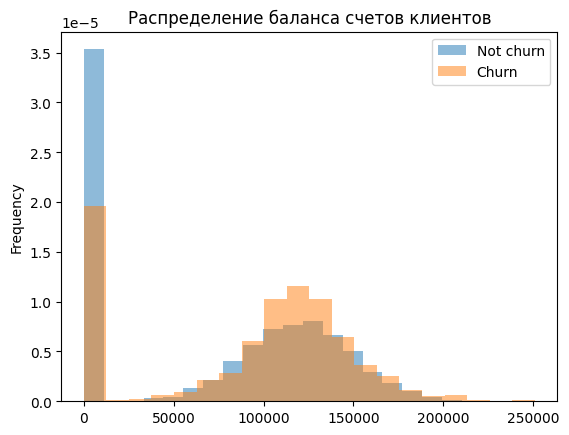

In [ ]:
# Гистограмма распределения баланса счетов оставшихся и ушедших клиентов

data_bank['Balance'].plot(kind='hist', alpha = 0.5, density = True, bins=20, label='Not churn')


data_exit['Balance'].plot(kind='hist', alpha = 0.5, density = True, bins=20, label='Churn')
plt.legend(loc='upper right')
plt.title('Распределение баланса счетов клиентов')


Результаты анализа данных говорят, что клиенты с более высоким балансом счета чаще покидают банк, чем клиенты с меньшим балансом счета. Средний баланс счета покинувших банк клиентов значительно превышает средний баланс счета оставшихся в банке клиентов (91108 против 72745). В достаточно большом сегменте клиентов с нулевым счетом (36,17% от общего числа) процент покинувших банк составляет 13,82%.

АНАЛИЗ ПОКАЗАТЕЛЯ - КОЛИЧЕСТВО ПРОДУКТОВ БАНКА

Text(0.5, 1.0, 'Сравнение клиентов по количеству открытых продуктов')

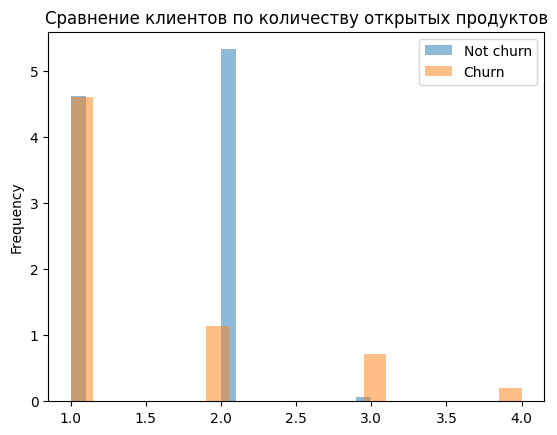

In [ ]:
# Гистограмма сравнения клиентов по количеству банковских продуктов

data_bank['NumOfProducts'].plot(kind='hist', alpha = 0.5, density = True, bins=20, label='Not churn')

data_exit['NumOfProducts'].plot(kind='hist', alpha = 0.5, density = True, bins=20, label='Churn')
plt.legend(loc='upper right')
plt.title('Сравнение клиентов по количеству открытых продуктов')

Большинство наших лояльных клиентов останавливается на 2-х продуктах. Те, кто берет больше, как правило, уходят.

АНАЛИЗ ПОКАЗАТЕЛЯ - ОЦЕНОЧНАЯ ЗАРПЛАТА КЛИЕНТА

In [ ]:
# Средняя оценочная зарплата клиента банка, оставшегося в банке
data_bank['EstimatedSalary'].mean()


99738.39177194524

In [ ]:
# Зарплаты оставшихся клиентов
data_salary = data_bank['EstimatedSalary']

In [ ]:
# Средняя оценочная зарплата клиента, покинувшего банк
data_exit['EstimatedSalary'].mean()

101465.67753068237

In [ ]:
# Зарплаты ушедших клиентов
data_salary_ex = data_exit['EstimatedSalary']

Проверим статистическую гипотезу, что оценочная зарплата клиентов покинувших банк не отличается от оценочной зарплаты клиентов оставшихся в банке

Для корректного анализа сделаем семплирование выборок к одинаковому размеру

In [ ]:
data_salary = np.random.choice(data_salary, len(data_salary_ex), replace=False)

In [ ]:
# Преобразуем тип numpy.ndarray в Series
data_salary = pd.Series(data_salary)

Посмотрим гистограммы плотности распредения показателей оценочной зарплаты оставшихся и ушедших клиентов

<Axes: title={'center': 'Распределение оценочной зарплаты оставшихся клиентов'}, ylabel='Frequency'>

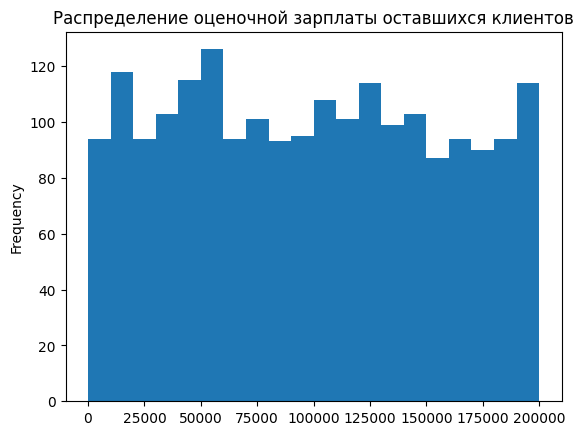

In [ ]:
# Гистограмма распределения оценочной зарплаты оставшихся клиентов

data_salary.plot(kind='hist',
                   title='Распределение оценочной зарплаты оставшихся клиентов', bins=20)

<Axes: title={'center': 'Распределение оценочной зарплаты ушедших клиентов'}, ylabel='Frequency'>

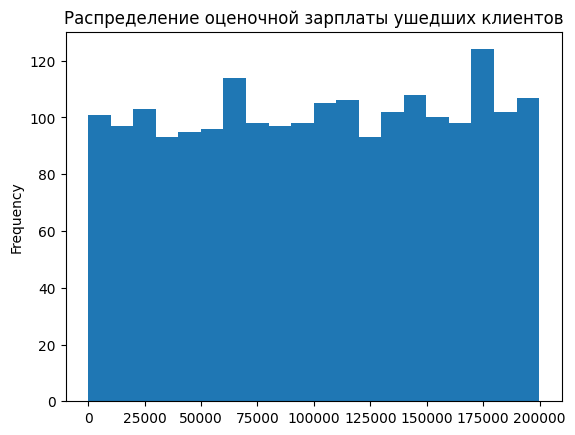

In [ ]:
# Гистограмма распределения оценочной зарплаты ушедших клиентов

data_salary_ex.plot(kind='hist',
                   title='Распределение оценочной зарплаты ушедших клиентов', bins=20)

проведем двухвыборочный t-тест:

H0: оценочные зарплаты клиентов покинувших банк и оставшихся в банке равны, H1: оценочные зарплаты клиентов покинувших банк и оставшихся в банке равны отличаются

Так как плотности имеют распределения, отличные от нормального, используем для проверки гипотезы U-критерий Манна-Уитни

In [ ]:
t_stat, p = stats.mannwhitneyu(data_salary, data_salary_ex)

print(t_stat, p)

2017212.0 0.12575466231193622


Так как p-value > 0.05, то мы подтвердили нулевую гипотезу что оценочные зарплаты равны. Следовательно оценочная зарплата клиента не влияет на его решение покинуть банк

АНАЛИЗ ПОКАЗАТЕЛЯ - АКТИВНОСТЬ КЛИЕНТА

In [ ]:
# Распределение клиентов по активности
data_activ = data.groupby('IsActiveMember')['Exited'].count().reset_index()
data_activ

,IsActiveMember,Exited
0,0,4849
1,1,5151


In [ ]:
# Распределение покинувших банк клиентов по активности
data_activ_ex = data_exit.groupby('IsActiveMember')['Exited'].count().reset_index()
data_activ_ex

,IsActiveMember,Exited
0,0,1302
1,1,735


In [ ]:
# Процент клиентов покинувших банк по активности
data_activ_ex['%_exit'] = round(data_activ_ex['Exited']/data_activ['Exited']*100, 2)
data_activ_ex

,IsActiveMember,Exited,%_exit
0,0,1302,26.85
1,1,735,14.27


<Axes: title={'center': 'Процент покинувших банк клиентов по активности'}, xlabel='Неактивные / активные', ylabel='Процент'>

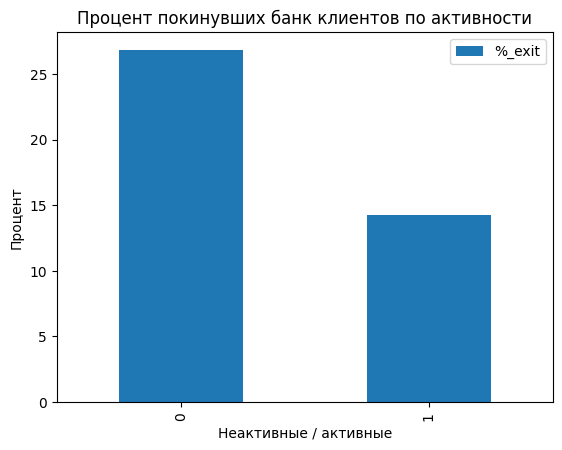

In [ ]:
# Диаграмма покинувших банк клиентов по активности

data_activ_ex.plot(kind='bar',
            x= 'IsActiveMember',
            y= '%_exit',
                   xlabel= 'Неактивные / активные',
                   ylabel= 'Процент',
                   title='Процент покинувших банк клиентов по активности')

Данные показывают, что активных клиентов значительно меньше покинуло банк чем неактивных клиентов (14,27% против 26,85%)





АНАЛИЗ ПОКАЗАТЕЛЯ - КРЕДИТНЫЙ РЕЙТИНГ КЛИЕНТА

In [ ]:
# Средний кредитный ретинг клиента, оставшегося в банке
data_bank['CreditScore'].mean()

651.8531960316463

In [ ]:
# Кредитные рейтинги оставшихся клиентов
data_score = data_bank['CreditScore']

In [ ]:
# Средний кредитный ретинг клиента, покинувшего банк
data_exit['CreditScore'].mean()

645.3514972999509

In [ ]:
# Кредитные рейтинги ушедших клиентов
data_score_ex = data_exit['CreditScore']

Проверим статистическую гипотезу, что кредитный рейтинг клиентов покинувших банк не отличается от кредитного рейтинга клиентов оставшихся в банке

Приведем выборки к одинаковому размеру при помощи команды np.random.choice

In [ ]:
data_score = np.random.choice(data_score, len(data_score_ex), replace=False)

In [ ]:
# Преобразуем тип numpy.ndarray в Series
data_score = pd.Series(data_score)

Посмотрим гистограммы плотности распредения показателей кредитного рейтинга оставшихся и ушедших клиентов

<Axes: title={'center': 'Распределение кредитного рейтинга оставшихся клиентов'}, ylabel='Frequency'>

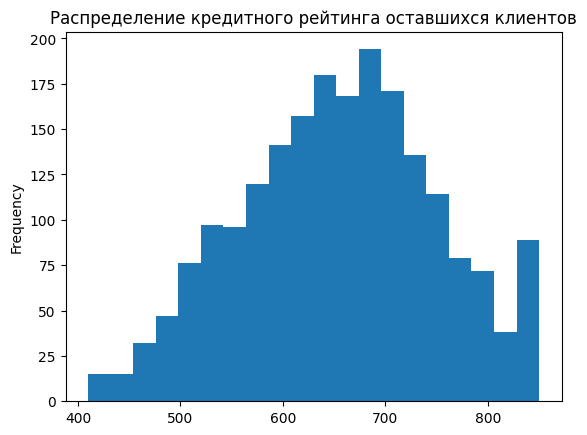

In [ ]:
# Гистограмма распределения кредитного рейтинга оставшихся клиентов

data_score.plot(kind='hist',
                   title='Распределение кредитного рейтинга оставшихся клиентов', bins=20)

<Axes: title={'center': 'Распределение кредитного рейтинга ушедших клиентов'}, ylabel='Frequency'>

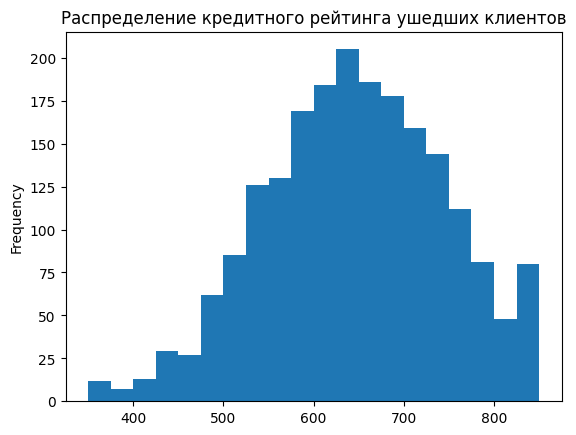

In [ ]:
# Гистограмма распределения кредитного рейтинга ушедших клиентов

data_score_ex.plot(kind='hist',
                   title='Распределение кредитного рейтинга ушедших клиентов', bins=20)

Проведем двухвыборочный t-тест:

H0: кредитные рейтинги клиентов покинувших банк и оставшихся в банке равны, H1: кредитные рейтинги клиентов покинувших банк и оставшихся в банке равны отличаются

Так как плотности имеют распределения, близкие к нормальному, значит применяем проверку Т-критерием Стьюдента

In [ ]:
t_stat, p = stats.ttest_ind(data_score, data_score_ex)

print(t_stat, p)

2.9767549636018558 0.0029303169986358143


Так как p-value < 0.05 то мы отвергаем нулевую гипотезу о равенстве кредитных рейтингов. Следовательно можно считать что в нашей выборке кредитный рейтинг оставшихся клиентов выше кредитного рейтинга ушедших клиентов, исходя из значений их средних показателей

АНАЛИЗ ПОКАЗАТЕЛЯ - СТАЖ КЛИЕНТА В БАНКЕ

In [ ]:
# Средний стаж клиента, оставшегося в банке
data_bank['Tenure'].mean()

5.033278914981791

In [ ]:
# Стаж оставшихся клиентов
data_tenure = data_bank['Tenure']

In [ ]:
# Средний стаж клиента, покинувшего банк
data_exit['Tenure'].mean()

4.932744231713304

In [ ]:
# Стаж ушедших клиентов
data_tenure_ex = data_exit['Tenure']

Проверим статистическую гипотезу, что стаж клиентов покинувших банк не отличается от стажа клиентов оставшихся в банке

Выровняем выборки семплированием

In [ ]:
data_tenure = np.random.choice(data_tenure, len(data_tenure_ex), replace=False)

In [ ]:
# Преобразуем тип numpy.ndarray в Series
data_tenure = pd.Series(data_tenure)

Посмотрим гистограммы плотности распредения показателей стажа оставшихся и ушедших клиентов

<Axes: title={'center': 'Распределение стажа оставшихся клиентов'}, ylabel='Frequency'>

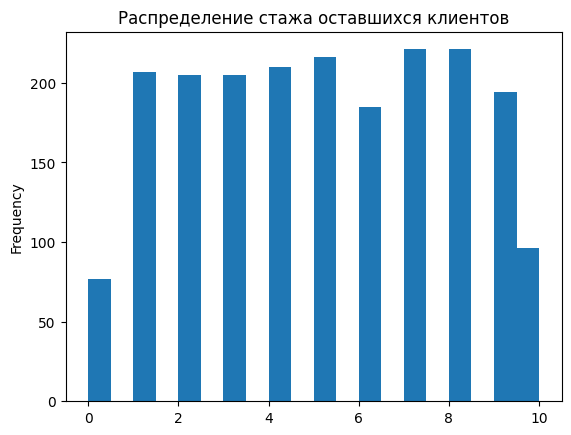

In [ ]:
# Гистограмма распределения стажа оставшихся клиентов

data_tenure.plot(kind='hist',
                   title='Распределение стажа оставшихся клиентов', bins=20)

<Axes: title={'center': 'Распределение стажа ушедших клиентов'}, ylabel='Frequency'>

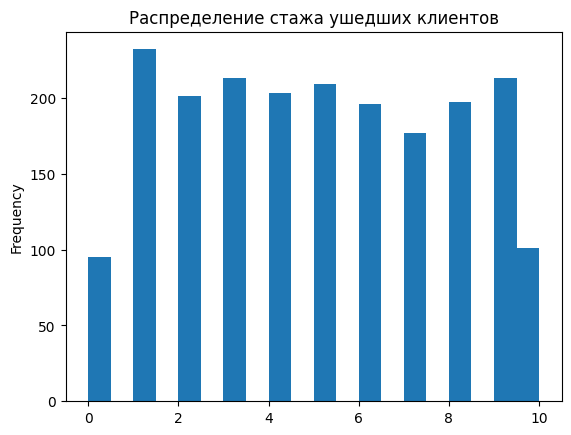

In [ ]:
# Гистограмма распределения стажа ушедших клиентов

data_tenure_ex.plot(kind='hist',
                   title='Распределение стажа ушедших клиентов', bins=20)

проведем двухвыборочный t-тест:

H0: Стаж клиентов покинувших банк и оставшихся в банке равны, H1: Стаж клиентов покинувших банк и оставшихся в банке равны отличаются

Так как плотности имеют распределения, отличные от нормального, используем для проверки гипотезы U-критерий Манна-Уитни

In [ ]:
t_stat, p = stats.mannwhitneyu(data_tenure, data_tenure_ex)
print(t_stat, p)

2122209.5 0.20332938587329585


Так как p-value > 0.05 то мы подтвердили нулевую гипотезу что стаж оставшихся в банке клиентов и ушедших из банка равны. Следовательно данный показатель не влияет на отток клиентов из банка

<ipython-input-6-9622a4234ff1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


<Axes: >

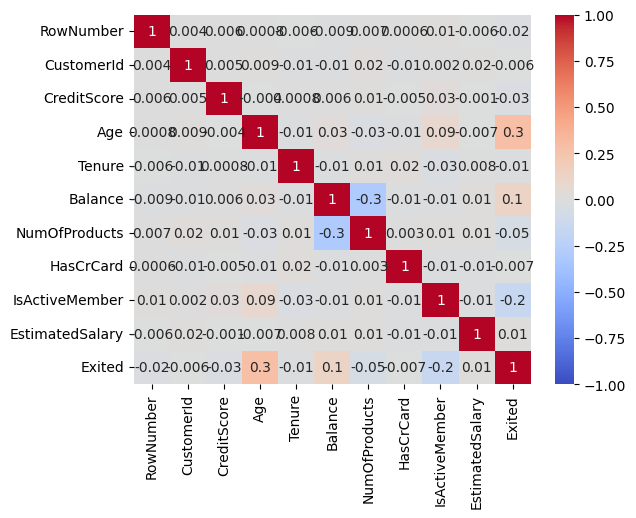

In [ ]:
# Построим тепловую матрицу корреляции между всеми показателями
sns.heatmap(data.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Анализируя зависимость между параметрами датаcета, можно заметить их слабо выраженную корреляцию. Наибольшую корреляцию имеет обратная зависимость баланса счета клиента с количеством продуктов банка (-0,3), а также прямая зависимость возраста клиента и его намерением покинуть банк (0,3)

<Axes: title={'center': 'Зависимость между балансом счета и количеством продуктов в банке'}, xlabel='Баланс счета', ylabel='Количество продуктов'>

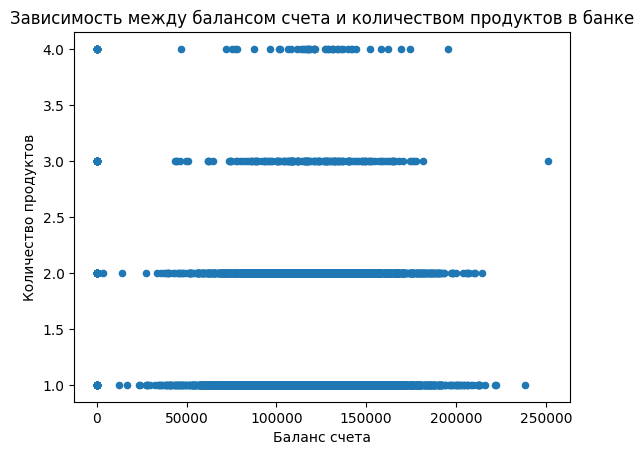

In [ ]:
# Диаграмма зависимости баланса счета клиента и количеством продуктов банка
data.plot(kind='scatter',
        x='Balance',
        y='NumOfProducts',
        title='Зависимость между балансом счета и количеством продуктов в банке', xlabel='Баланс счета', ylabel='Количество продуктов')

Аналицируя приведенную диаграмму можно сделать вывод, что в целом с увеличением баланса счета клиенты менее склонны к приобретению дополнительных продуктов банка

ПОСТРОЕНИЕ МОДЕЛИ

In [ ]:
# Преобразуем категориальные переменные в cтолбце "Geography" при помощи pandas-функции get_dummies
data_ohe = pd.get_dummies(data, columns =['Geography'])
data_ohe.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
# Изменим значения в столбце "Gender" на числовые
data_ohe['Gender'] = data_ohe['Gender'].replace(['Male', 'Female'], [1, 0,])

In [ ]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [ ]:
data_ohe.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
data_log = data_ohe[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain']]

In [ ]:
data_class = data_ohe['Exited']

In [ ]:
# разделяем выборку на тренировочную и тестовую в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(data_log, data_class, test_size=0.2, random_state=40)

Для построения модели используем логистическую регрессию, т.к. переменная отклика (отток клиента) принимает категориальное значение

In [ ]:
lr = LogisticRegression()

In [ ]:
# обучаем данные
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# делаем прогноз на тестовой выборке
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lr.predict(X_test)]).T

In [ ]:
result

,Exited,Unnamed 0
293,1.0,0.0
1244,0.0,0.0
7353,1.0,NaN
5145,0.0,NaN
1618,0.0,0.0
...,...,...
5361,0.0,NaN
7365,1.0,NaN
1162,0.0,0.0
9434,0.0,NaN


In [ ]:
# Предсказание качества модели на тренировочных данных
train_accuracy = accuracy_score(y_train, lr.predict(X_train))
train_accuracy

0.788

In [ ]:
# Оценим качество модели на тестовых данных
accuracy_score(y_test, lr.predict(X_test))

0.8

Наша модель показывает более высокую точность (80.0 %) на тестовых данных, чем на тренировочных данных (78.8%). Это хороший показатель, так как это означает, что модель хорошо обобщает данные и способна делать точные предсказания на новых данных, которые она ранее не видела. Но стоит учитывать, что точность модели может изменяться в зависимости от конкретного набора данных и методов оценки качества модели.

ВЫВОДЫ ИССЛЕДОВАНИЯ

В результате анализа параметров датасета по оттоку клиентов из банка выявлена их слабая корреляция между собой. Параметрами с наибольшей корреляцией по оттоку, являются возраст клиента (0,3), баланс счета (0,1) и активность клиента (-0,2). Также определены параметры, не влияющие на отток клиентов. Это стаж клиента в банке, оценочная зарплата клиента и наличие кредитной карты банка.

Предложены рекомендации для стейкхолдеров банка по уменьшению оттока клиентов.
- Разработать программы лояльности для клиентов старшего возраста, например льготные условия на новые продукты банка.
- Проводить регулярные опросы клиентов, чтобы узнать их потребности, ожидания, мнение о качестве обслуживания и услугах банка.
- Сегментировать клиентов по размеру баланса счета и переводить клиентов определенного сегмента в разряд VIP клиентов, снижая им плату за обслуживание, комиссии на переводы, а также закрепляя за ними персонального менеджера – консультанта.
-  Изучить причины оттока клиентов из Германии, предложить им специальные условия и привилегии, которые будут стимулировать их оставаться в банке.
- Проводить регулярные анализы и мониторинг оттока клиентов из Германии, изучить конкурентов на рынке Германии и разработать стратегию, которая позволит банку сохранить своих клиентов и привлечь новых
- Создать для клиентов женщин программу лояльности. Организовать маркетинговые кампании, направленные на удержание женских клиентов. Рассказывать о новых услугах, предоставлять интересную информацию, проводить конкурсы и акции.
- Улучшить качество обслуживания активных клиентов, например, предоставлять им более выгодные условия по кредитованию или инвестированию.
- Проводить мероприятия для привлечения новых активных клиентов, например, организовывать специальные акции и предложения для новых клиентов.
- Улучшить коммуникацию с активными клиентами, в том числе через социальные сети и мессенджеры. Это позволит удержать клиентов и повысить лояльность к банку.
- При разработке новых продуктов и услуг глубже изучать запросы и потребности клиентов, чтобы они были актуальны для клиентов и помогали удерживать их в банке.
